The task is top create a model that forcasts the traffic of a website using the ARIMA model

In [1]:
# import data
import pandas as pd

data = pd.read_csv("webtraffic.csv")
data.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [2]:
# check for null values
data.isnull().sum()


Date     0
Views    0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


data set has two columns date and views.Convert date dtype to datetime dtype from object

In [4]:
data["Date"] = pd.to_datetime(data["Date"], format= "%d/%m/%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


having a look at the daily traffic of the website

In [5]:
import matplotlib.pyplot as plt


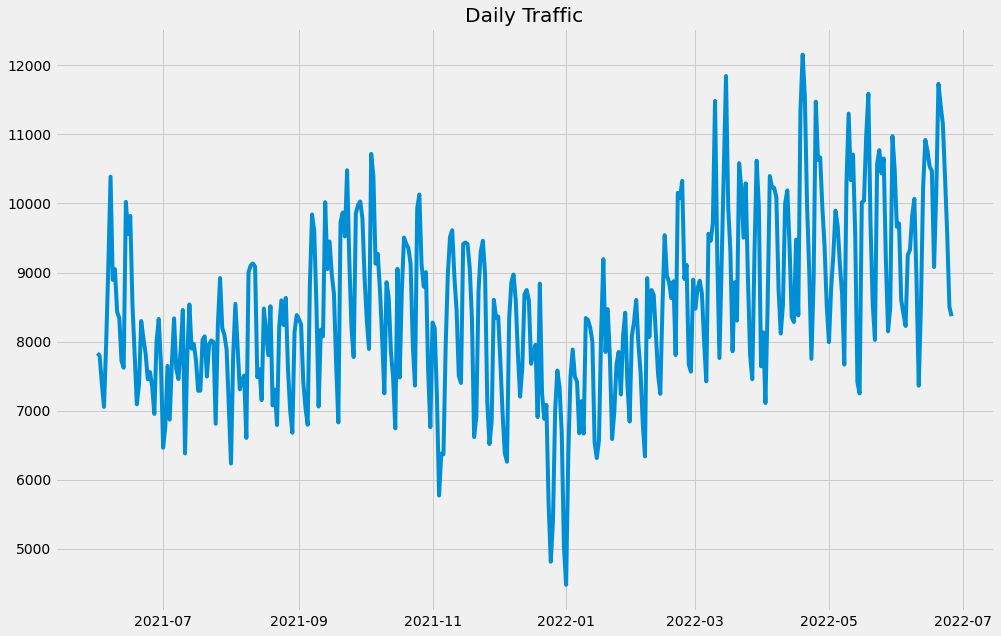

In [6]:
plt.style.use("fivethirtyeight")
plt.figure(figsize= (15, 10))
plt.plot(data.Date, data.Views)
plt.title("Daily Traffic")
plt.show()

website traffic data is seasonal; as traffic increases during weekdays and decreases during weekends.Now find out if the data is stationary or seasonal

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 432x288 with 0 Axes>

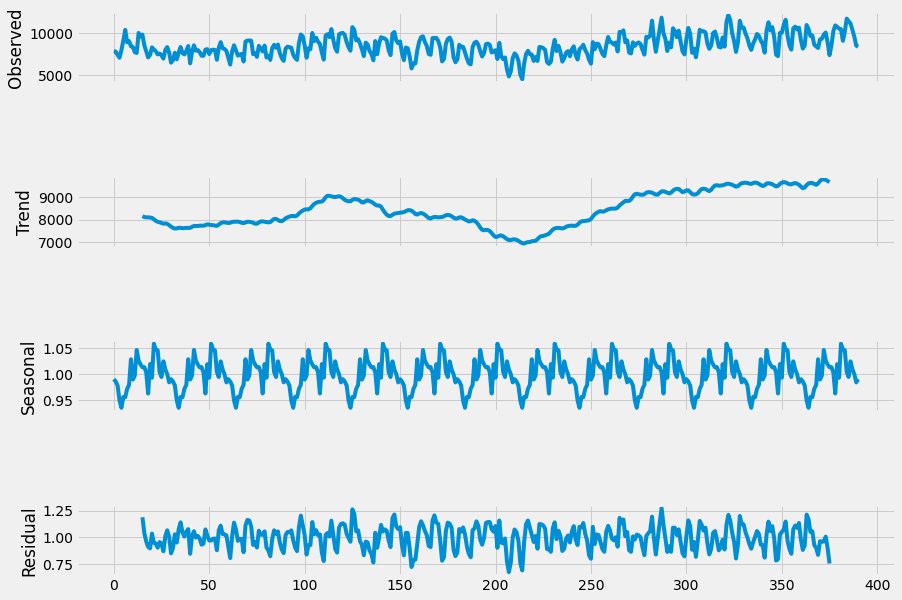

In [8]:
seasonal = seasonal_decompose(data.Views, model= "multiplicatsive", freq= 30)

fig = plt.figure()

fig = seasonal.plot()

fig.set_size_inches(15,10)


use seasonal arima (sarima) model to forecast traffic on the website.

Find the p,d q values.data i not seasonmal hence d = 1.To find p and q, use the autocorrelation and partial autocorrelation plots

[find p, q and d](https://thecleverprogrammer.com/2022/06/21/time-series-forecasting-with-arima/)


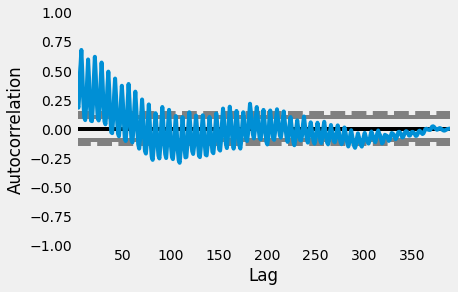

In [10]:
pd.plotting.autocorrelation_plot(data.Views)

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf


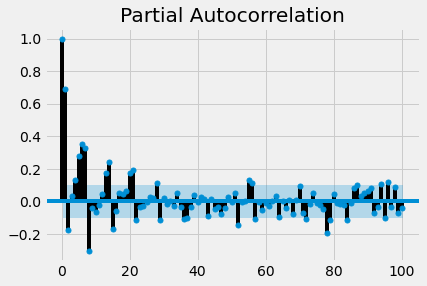

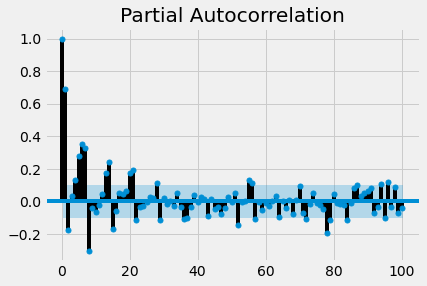

In [17]:

plot_pacf(data.Views, lags= 100)

train sarima model

In [19]:
import statsmodels.api as sm

In [21]:
p, d, q = 5, 1, 2

model = sm.tsa.statespace.SARIMAX(data.Views,
                                  order = (p, d, q),
                                  seasonal_order= (p, d, q, 12))

model = model.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.037
Date:                            Sun, 24 Jul 2022   AIC                           6228.074
Time:                                    19:56:45   BIC                           6287.098
Sample:                                         0   HQIC                          6251.500
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7618      0.130      5.851      0.000       0.507       1.017
ar.L2         -0.7747      0.134   

do a forcast for the next 60days

In [23]:
pred = model.predict(len(data), len(data)+60)
pred

391     9931.551501
392    10807.648332
393    10771.689353
394     9860.933732
395     8779.792839
           ...     
447    10332.578856
448    11079.481147
449    10719.508679
450    10309.549622
451     9537.687018
Length: 61, dtype: float64

plotting the new prediction

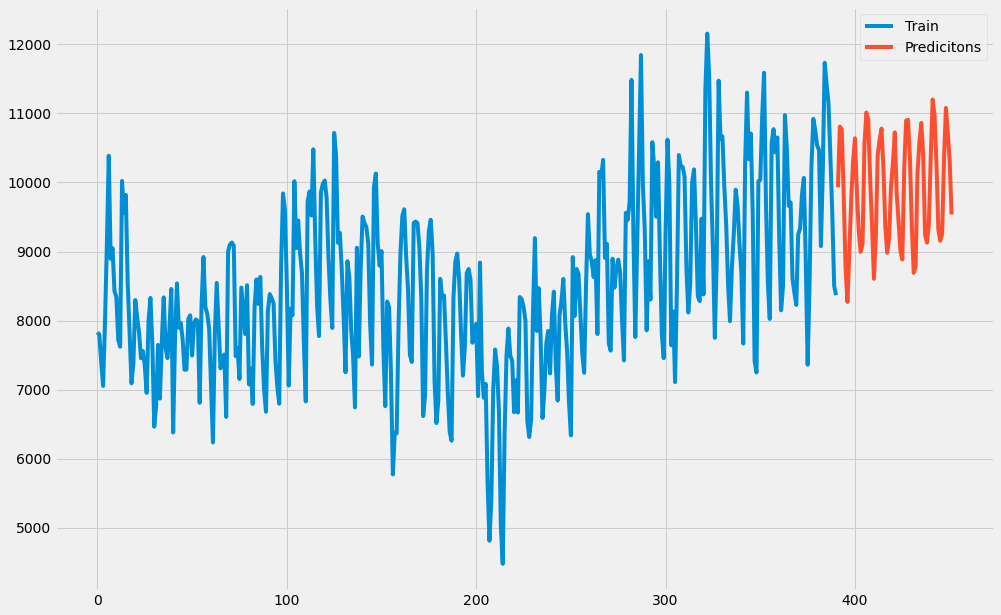

In [24]:
data.Views.plot(legend= True, label= "Train", figsize= (15, 10))

pred.plot(legend= True, label= "Predicitons")